# Exercises in clustering
You will try to perform clustering analysis on a couple of datasets. To get you started off, the first one will be the iris dataset seen in the slides.

In [19]:
import pandas as pd
df = pd.read_csv('../../day_1/exercises/iris.csv', sep = ";", index_col = 0, decimal = ",")

Import `KMeans` from `sklearn.clustering` and fit it on all 4 features of the iris dataset. Plot the inertia for different numbers of clusters.

In [20]:
# Import kmeans
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

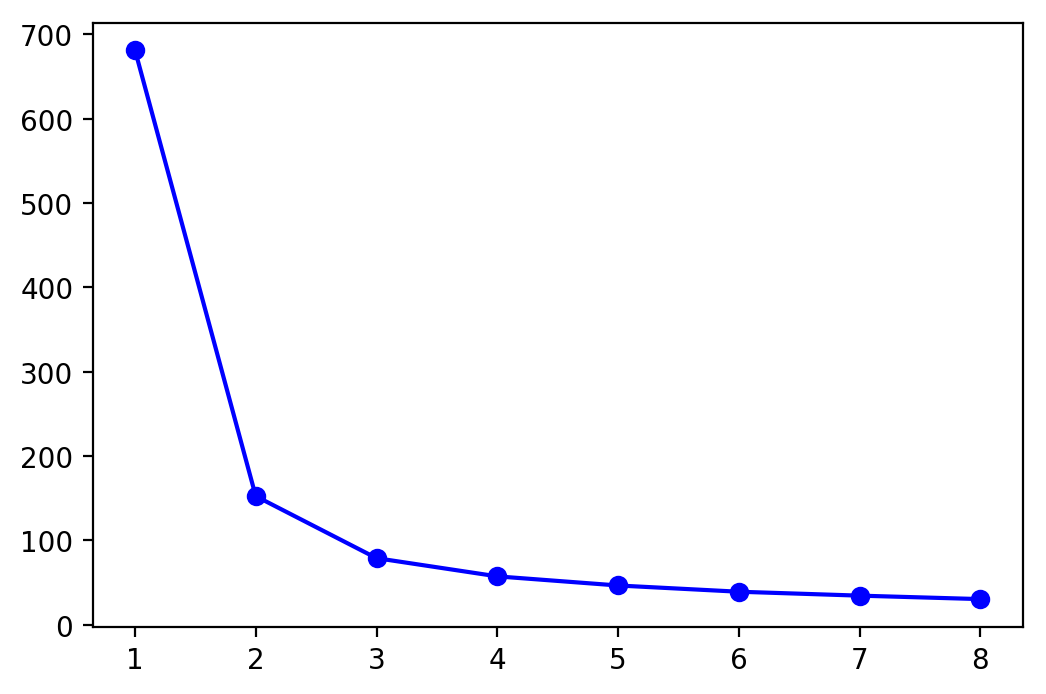

In [21]:
#ANS
# Import kmeans
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Store distances
n_clust = 8
dist = np.zeros(n_clust)

# Features
feat = ["Sepal.Length", "Sepal.Width", "Petal.Length", "Petal.Width"]

for i in range(n_clust):
    # Init model
    kmeans = KMeans(i + 1)
    
    # Fit models
    kmeans.fit(X = df[feat])

    # Get sum of squared distances to nearest cluster
    dist[i] = kmeans.inertia_

# Plot
plt.figure(dpi = 200)
plt.plot(np.arange(n_clust) + 1, dist, 'bo-')

plt.show()

Try to perform the same analysis on the `gaussian_2d_train.csv` dataset.

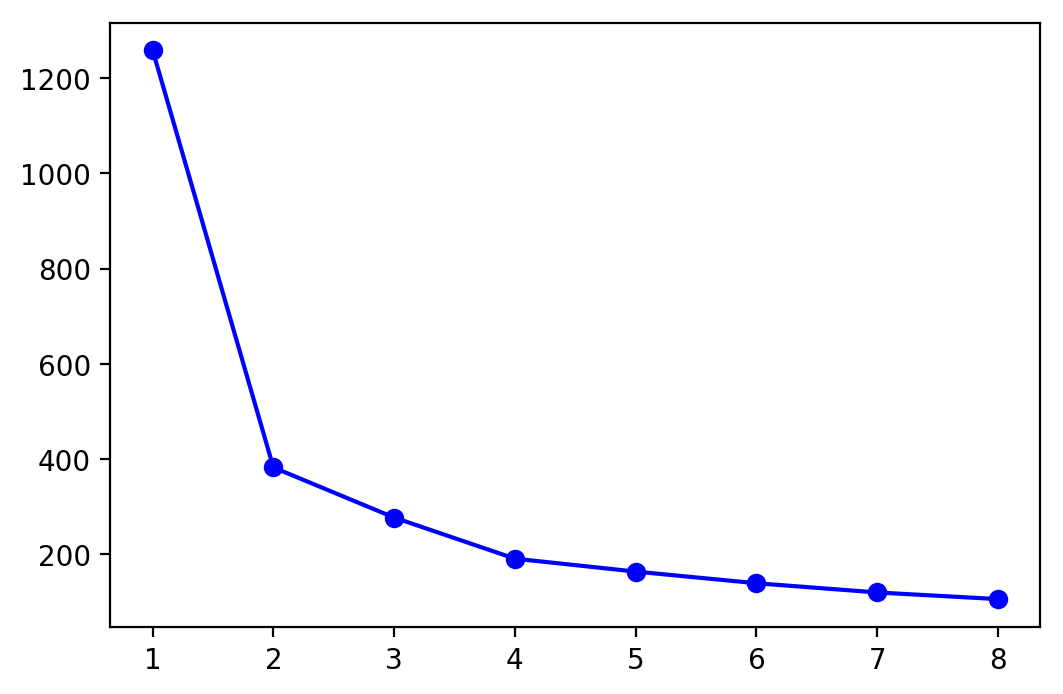

In [22]:
#ANS
import pandas as pd
df = pd.read_csv('../slides/gaussian_2d_train.csv', index_col = 0)

# Import kmeans
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Store distances
n_clust = 8
dist = np.zeros(n_clust)

# Features
feat = ["a", "b"]

for i in range(n_clust):
    # Init model
    kmeans = KMeans(i + 1)
    
    # Fit models
    kmeans.fit(X = df[feat])

    # Get sum of squared distances to nearest cluster
    dist[i] = kmeans.inertia_

# Plot
plt.figure(dpi = 200)
plt.plot(np.arange(n_clust) + 1, dist, 'bo-')

plt.show()

How many clusters would you guess the data contains using the "kink in the curve" method? - How many does it actually contain?

# A challenging dataset
Load the `embedded_circles.csv` dataset. Try to plot it, how many clusters do you think the dataset contains? - Try to apply the KMeans algorithm to the dataset and plot the dataset again, where you color the observations according to the clusters.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read data
df = pd.read_csv('embedded_circles.csv', index_col = 0)


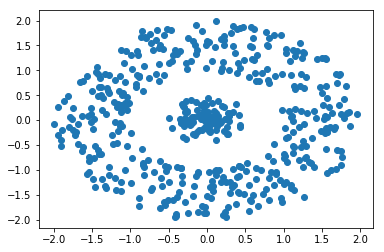

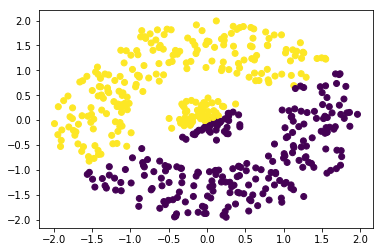

In [24]:
#ANS
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read data
df = pd.read_csv('embedded_circles.csv', index_col = 0)

# Plot dataset
plt.scatter(df.x, df.y)
plt.show()

# Perform 2 cluster kmeans
kmeans = KMeans(2)
kmeans.fit(df)

# Get the clusters for each observation
clust = kmeans.predict(df)

# Plot with clusters
plt.scatter(df.x, df.y, c = clust)
plt.show()

Does this resemble what you intuitively recognize as clusters? No? - One way to separate the data points is to think about what distinguishes the two circles. In this case the radius of the circle. Try to calculate the radius for each data point and do K-Means on this. Add constant `y`-values so you are able to make a scatter plot. Plot the transformed data points colored by the allocated cluster. Also plot the original data points with these cluster allocations.

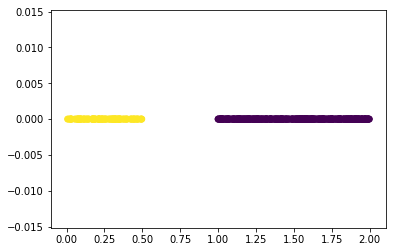

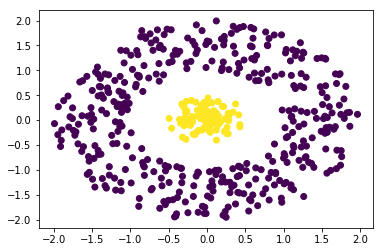

In [25]:
#ANS
import numpy as np

# Calculate the radius
x = np.sqrt(df.x**2 + df.y**2)
y = np.zeros(x.shape[0])

# Put data into an array
df_new = pd.DataFrame({'x': x, 'y': y})

# Fit K-Means
kmeans2 = KMeans(2)
kmeans2.fit(df_new)

# Get clusters
new_clust = kmeans2.predict(df_new)

# Plot
plt.scatter(x, y, c = new_clust)
plt.show()

plt.scatter(df.x, df.y, c = new_clust)
plt.show()

# Seeing K-Means at work
In order to see how the algorithm iterates, a custom K-Means implementation is imported, which allows us to follow what happens in each iteration. Create an instance of `KMeansCustom`. The object has a method called `plot_iterations` which will show the allocation of observations and the centroids for each iteration. Play around with this function to see how the points move.

`plot_iterations` uses the two methods `initialize` and `iterate`. The first method initializes the algorithm by creating a random allocation of observations. Iterate does an iteration of the algorithm be recomputing centroids and reallocating observations. You can also experiment with these. The current allocation can be extracted from the `alloc` attribute.

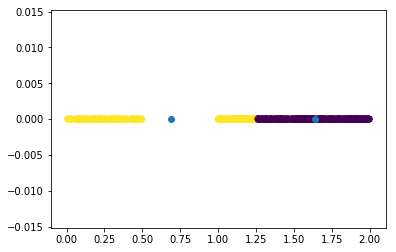

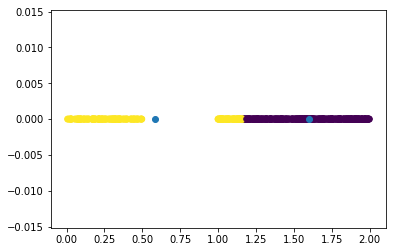

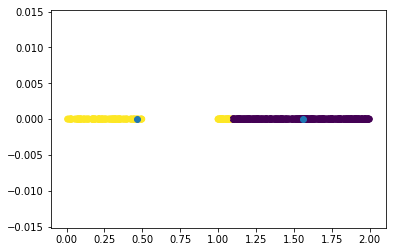

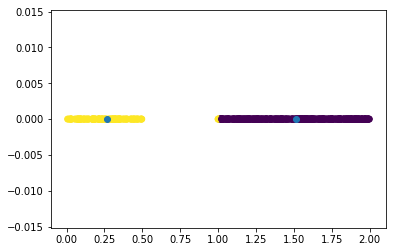

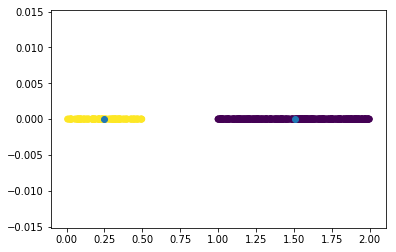

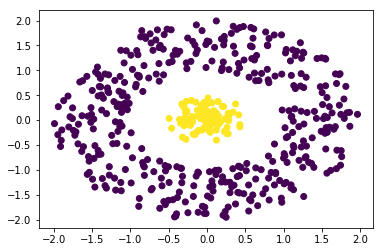

In [26]:
#ANS
from help_func import KMeansCustom
km = KMeansCustom(X = df_new.values)
km.plot_iterations(5)
plt.scatter(df.x, df.y, c = km.alloc)
plt.show()

In [18]:
#CONFIG
# Hide code tagged with #ANS
from IPython.display import HTML
HTML('''<script>
function code_hide() {
    var cells = IPython.notebook.get_cells()
    cells.forEach(function(x){ if(x.get_text().includes("#ANS")){
        if (x.get_text().includes("#CONFIG")){

        } else{
            x.input.hide()
            x.output_area.clear_output()
        }

        
    }
    })
}
function code_hide2() {
    var cells = IPython.notebook.get_cells();
    cells.forEach(function(x){
    if( x.cell_type != "markdown"){
        x.input.show()      
    }
    
        });
} 
$( document ).ready(code_hide);
$( document ).ready(code_hide2);
</script>
<form action="javascript:code_hide()"><input type="submit" value="Hide answers"></form>
<form action="javascript:code_hide2()"><input type="submit" value="Show answers"></form>''')